# Community Detection

---

In [27]:
import sys

sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import networkx as nx
import scripts.community_features as cf
import scripts.get_graph as gg
import scripts.plots as pl

---

## Get co-occurrence matrix

In [28]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv(
    "../../dataset/large_adjacency_matrix.csv", compression="gzip"
).values

# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)
# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)
# Get the graph
G_d = gg.get_weighted_graph(co_occurrence_matrix_d)

# Compute co-occurrence matrix symptoms-symptoms
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)
# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)
# Get the graph
G_s = gg.get_weighted_graph(co_occurrence_matrix_s)

Co-occurrence Matrix (Disease-Disease):
[[ 6  1  0 ...  0  1  0]
 [ 1 10  0 ...  0  1  0]
 [ 0  0  8 ...  1  0  1]
 ...
 [ 0  0  1 ...  3  0  0]
 [ 1  1  0 ...  0  9  0]
 [ 0  0  1 ...  0  0  3]]
Co-occurrence Matrix (Symptom-Symptom):
[[ 46  28   7 ...   0   0   0]
 [ 28  46   3 ...   0   0   0]
 [  7   3 101 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0   0   1]]


---

## Identify communities

#### **Approach 1**: Hierarchical clustering

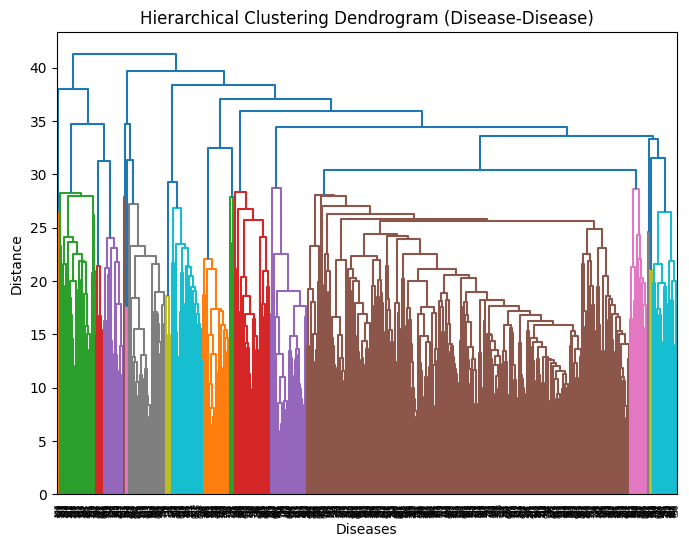

Cluster labels (Disease-Disease):
[4 4 3 4 3 4 4 4 2 2 3 3 3 4 4 1 3 1 4 3 4 4 4 4 4 4 4 4 4 2 4 2 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 3 4 1 4 4 4 4 4 3 4 4 2 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4
 1 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 1 4 4 4 4 4 4 4 1 4
 4 4 1 1 4 4 4 4 1 4 4 4 4 3 3 1 1 4 3 4 4 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4 2
 4 4 4 4 4 4 1 3 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 2 4 3 4 1 4 4 3 4 4 4 4
 4 4 4 4 4 4 4 1 1 4 4 4 4 4 4 4 2 1 4 4 2 4 3 3 4 1 4 2 4 4 4 4 4 4 4 1 4
 2 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 3 1 4 2 4 4 4 3 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 2 4 4 1 4 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 1 4 3 1 2 4 4 4 4 4 4 4 4 1 4 4 1 4 4 4 4
 4 4 4 4 4 4 4 1 1 4 4 1 1 1 4 1 4 1 1 2 4 1 1 4 1 2 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 2 4 3 2 4 1 1 1 4 4 4 4 4 4 1 1 4 2 4 4 4 4 4 4 1 4 4 4 3 4 4 4 4 4
 2 2 4 1 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 3 4 4 4 4 1 4 1 2 4 3 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 1 4 3 4 4 4 4 2 4 4 4 4

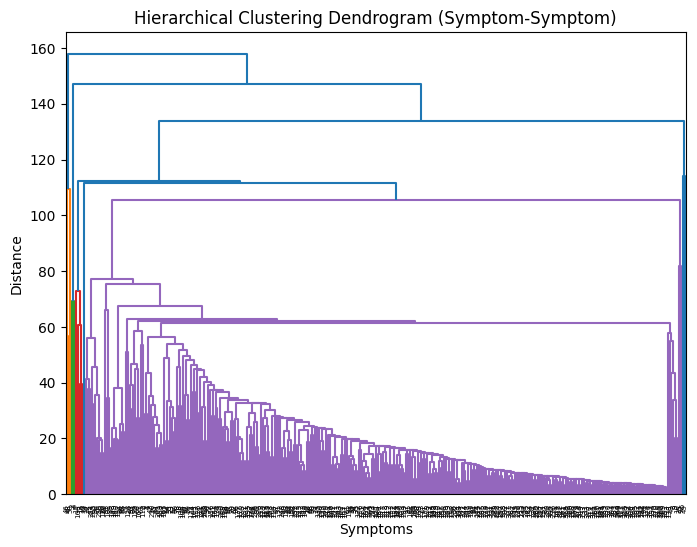

Cluster labels (Symptom-Symptom):
[3 3 2 3 2 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 3 1 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [3]:
# ----------------------------- DISEASES -----------------------------

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_d, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Disease-Disease)")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Disease-Disease):")
print(cluster_labels)


# ----------------------------- SYMPTOMS -----------------------------

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_s, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Symptom-Symptom)")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

distance_threshold = 4
cluster_labels = fcluster(linkage_matrix, t=distance_threshold, criterion='maxclust')
print("Cluster labels (Symptom-Symptom):")
print(cluster_labels)


#### **Approach 2**: Greedy modularity maximization

Communities: [frozenset({2, 3, 4, 7, 10, 11, 12, 14, 15, 16, 18, 19, 20, 24, 27, 29, 30, 33, 34, 35, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 50, 54, 55, 56, 57, 60, 61, 67, 69, 70, 72, 80, 81, 86, 89, 90, 95, 96, 97, 100, 102, 103, 104, 105, 110, 111, 115, 117, 120, 121, 122, 124, 125, 128, 129, 132, 135, 137, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 155, 160, 161, 162, 170, 171, 175, 176, 179, 180, 194, 201, 203, 207, 208, 211, 212, 214, 215, 216, 217, 221, 223, 225, 226, 228, 230, 231, 232, 233, 234, 235, 244, 245, 247, 248, 249, 250, 252, 256, 260, 267, 269, 273, 279, 284, 285, 286, 289, 290, 292, 295, 296, 297, 298, 299, 301, 302, 306, 308, 309, 314, 319, 320, 322, 324, 326, 327, 329, 330, 331, 332, 333, 334, 336, 338, 339, 340, 343, 352, 364, 375, 379, 381, 382, 383, 385, 386, 389, 391, 395, 396, 399, 400, 401, 403, 405, 412, 413, 414, 415, 418, 419, 420, 421, 422, 424, 427, 430, 431, 432, 435, 436, 438, 442, 444, 445, 446, 447, 449, 450, 451, 452, 453

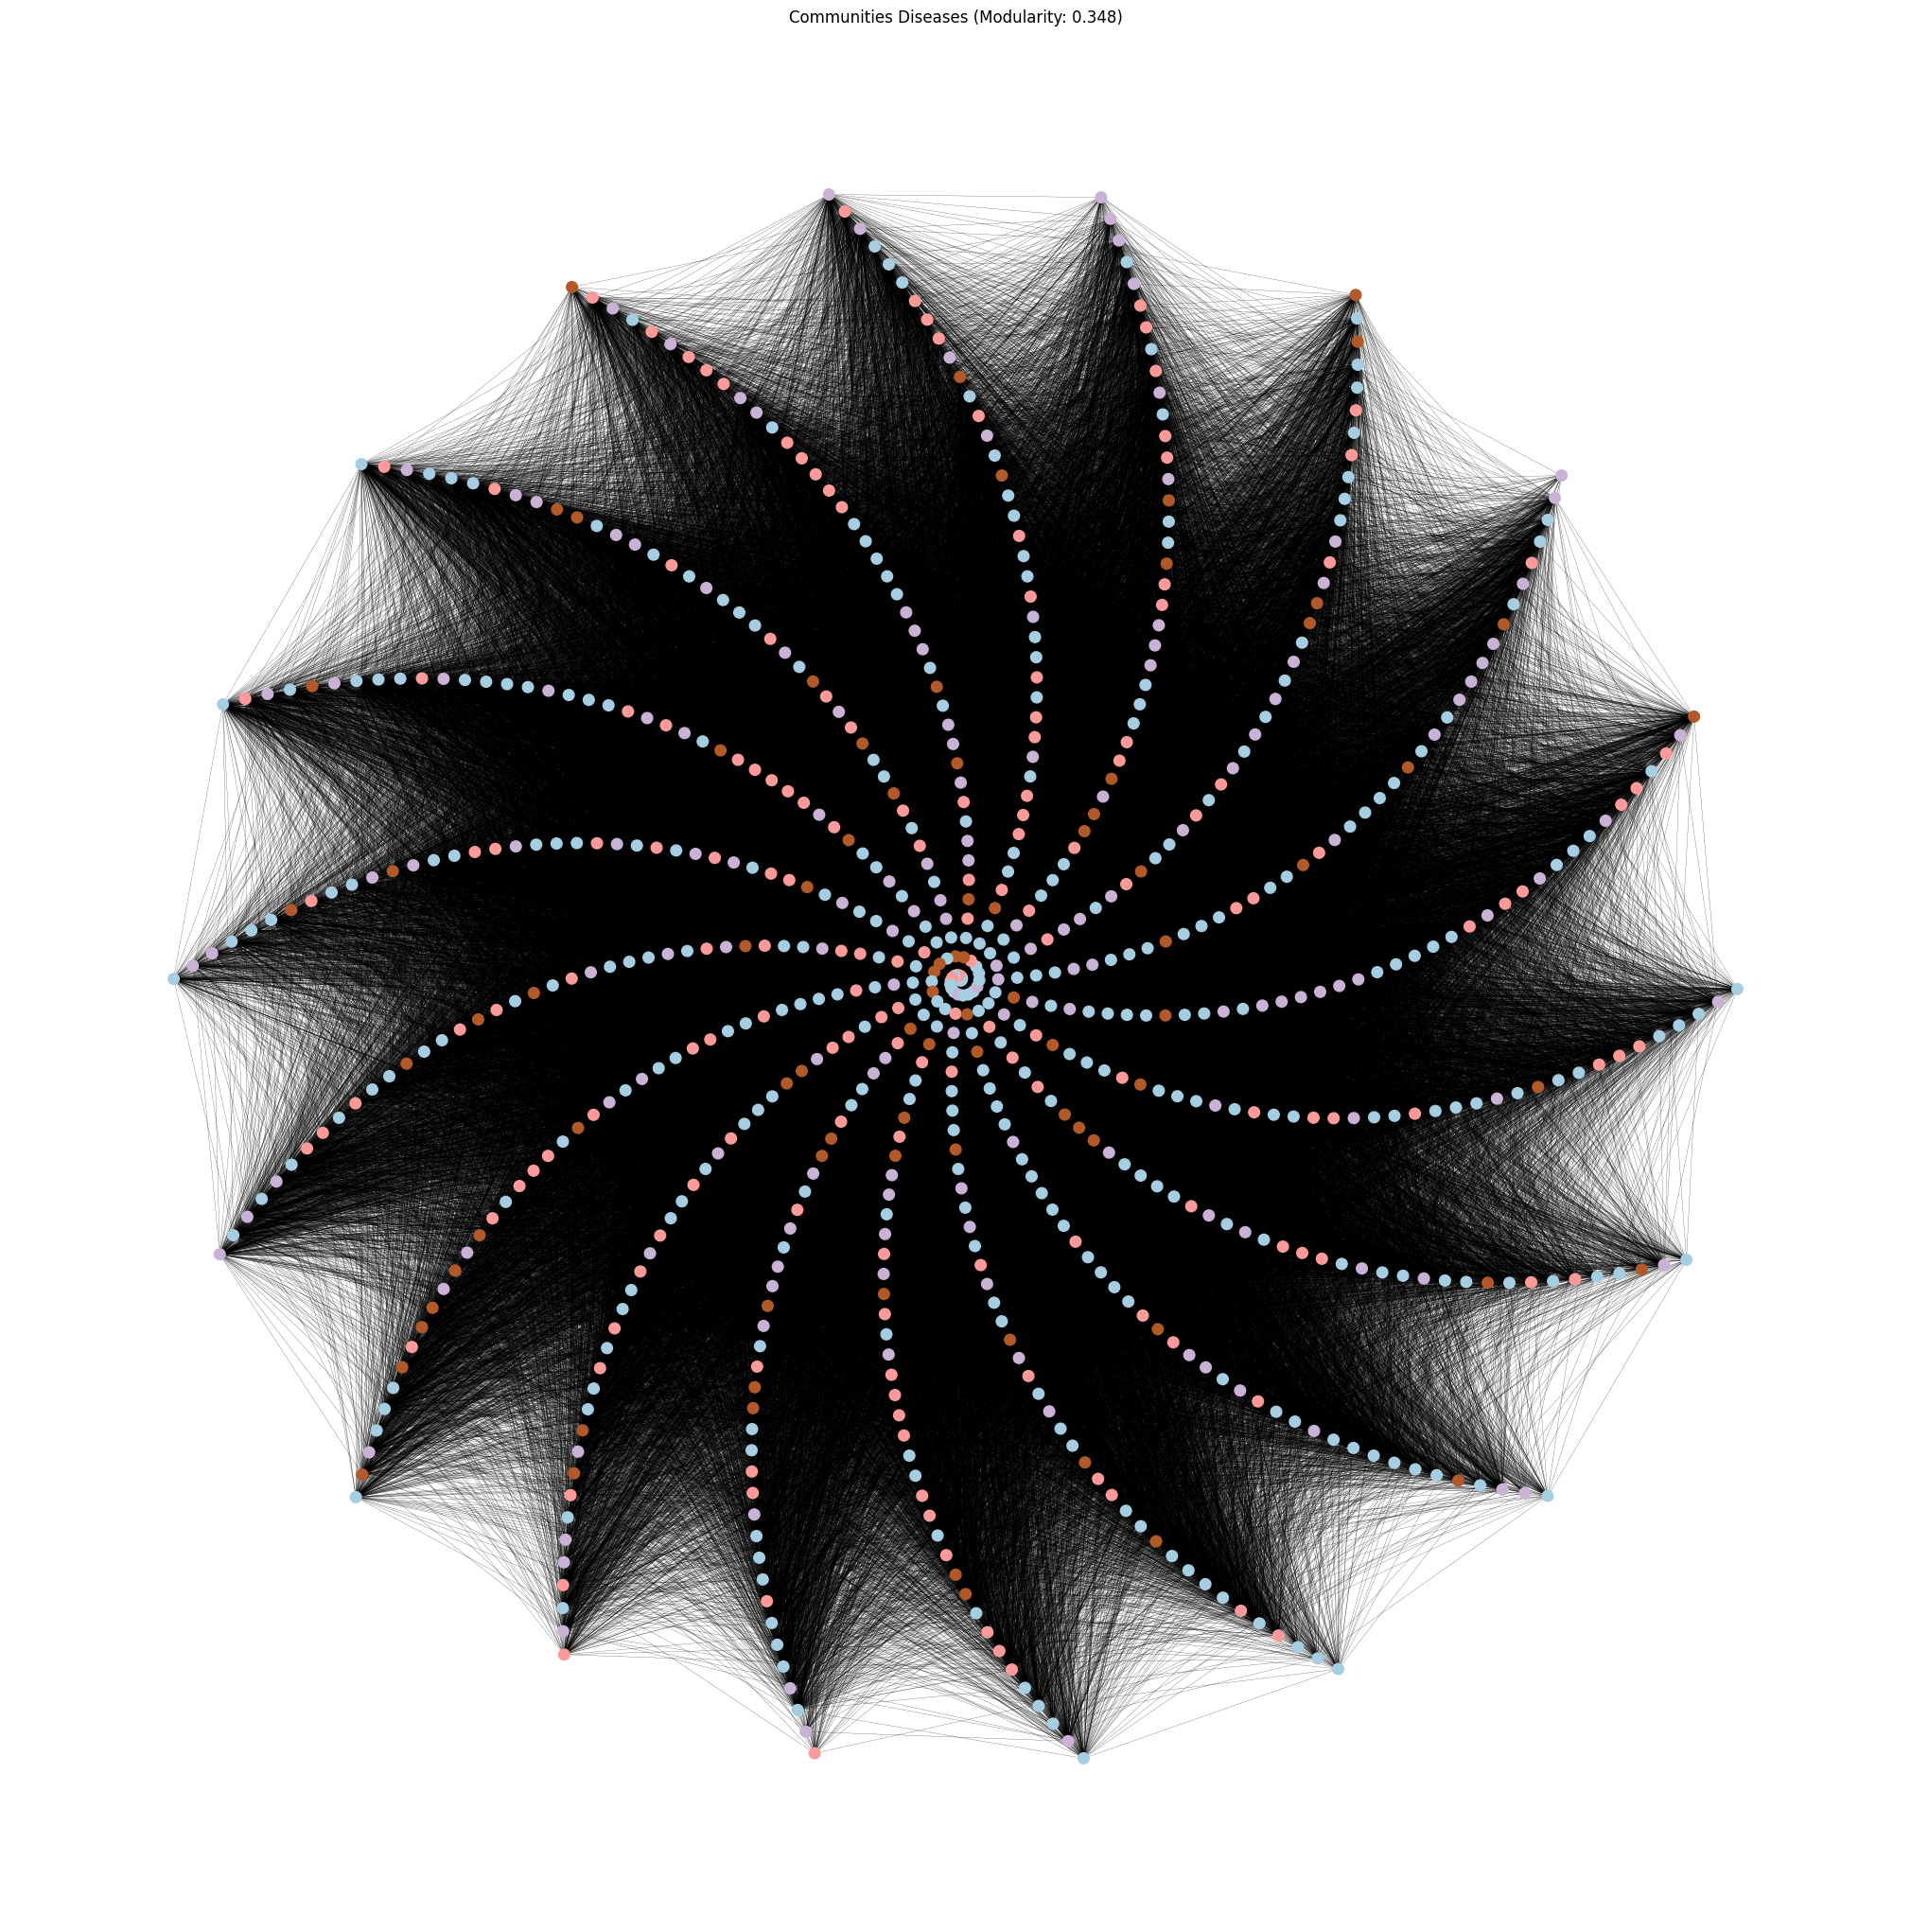

In [29]:
# --------------------------- DISEASES -----------------------------

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_d, weight='weight'))
communities_greedy_mod_diseases = communities
print("Communities:", communities)
modularity = nx.community.modularity(G_d, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
# pos = nx.kamada_kawai_layout(G_d)  # You can choose other layout algorithms
# nx.draw(
#         G_d, 
#         pos, 
#         node_color=list(color_map.values()),
#         with_labels=False, 
#         cmap=plt.cm.Paired,
#         node_size=70,
#         width=0.15,
#         )
        
# plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
# plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spiral_layout(G_d)  # You can use a different layout if needed

plt.figure(figsize=(20, 20))
# Draw nodes and edges
nx.draw(
    G_d, 
    pos, 
    node_color=[color_map[node] for node in G_d.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Diseases (Modularity: {:.3f})".format(modularity))
plt.show()

Communities: [frozenset({266, 270, 272, 278, 23, 280, 24, 282, 27, 28, 30, 287, 288, 33, 34, 35, 36, 294, 295, 38, 39, 297, 298, 46, 48, 306, 50, 307, 51, 52, 309, 54, 55, 312, 56, 57, 58, 59, 61, 60, 62, 322, 92, 95, 96, 97, 98, 100, 101, 102, 127, 134, 135, 136, 137, 165, 175, 176, 177, 178, 179, 180, 182, 183, 184, 192, 194, 195, 196, 197, 198, 203, 205, 206, 221, 222, 231, 232, 240, 241, 242, 243, 244, 245, 252}), frozenset({2, 4, 5, 8, 9, 10, 268, 12, 13, 15, 16, 17, 18, 19, 275, 20, 21, 279, 284, 293, 41, 43, 47, 304, 49, 305, 314, 73, 77, 78, 79, 91, 99, 104, 105, 106, 107, 108, 109, 110, 111, 122, 131, 138, 139, 140, 142, 143, 144, 145, 146, 147, 156, 166, 171, 186, 187, 191, 193, 199, 208, 210, 213, 214, 217, 218, 219, 223, 224, 225, 227, 228, 229, 233, 239, 246, 255}), frozenset({257, 130, 129, 267, 271, 273, 274, 276, 25, 26, 155, 283, 285, 31, 159, 291, 292, 164, 167, 168, 169, 170, 296, 172, 173, 174, 181, 185, 315, 188, 189, 318, 319, 63, 320, 64, 65, 66, 67, 68, 69, 70, 

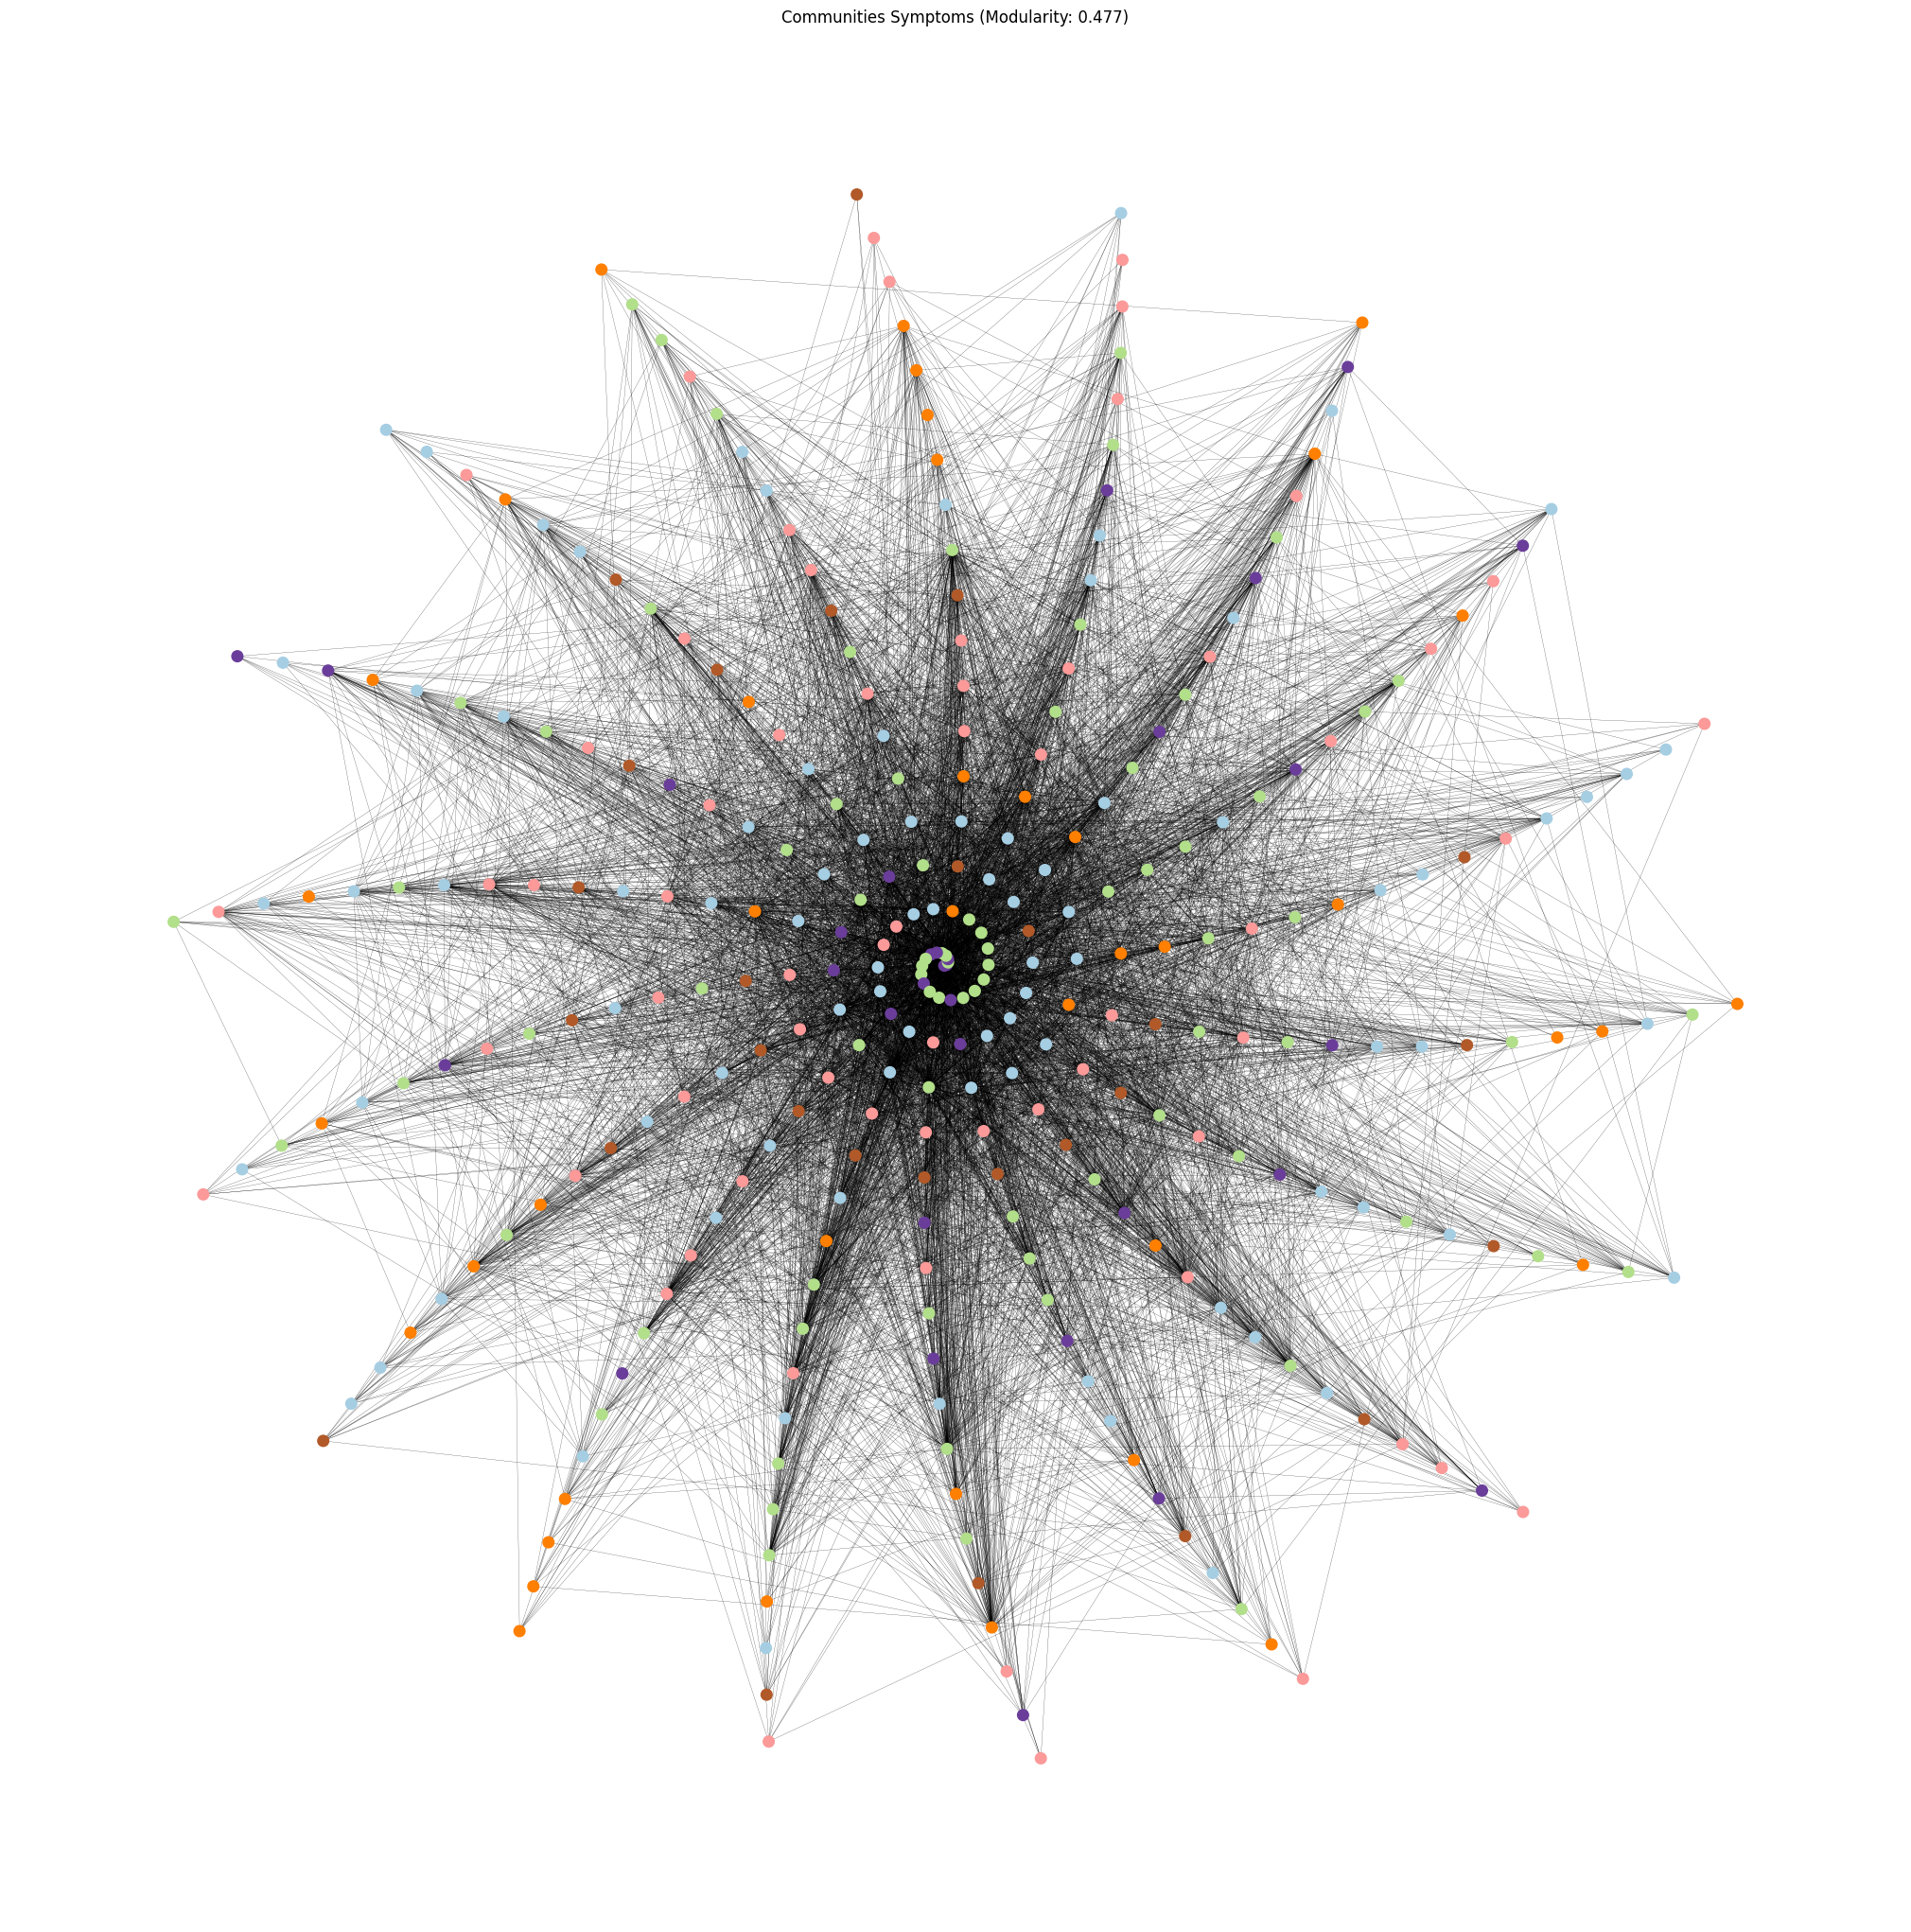

In [30]:
# ----------------------------- SYMPTOMS -----------------------------


# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G_s, weight='weight'))
communities_greedy_mod_symptoms = communities
print("Communities:", communities)
modularity = nx.community.modularity(G_s, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})
    

# Draw the graph with node coloration keeping kamada_kawai_layout to compare it with the original one with no clusters
# pos = nx.kamada_kawai_layout(G_s)  # You can choose other layout algorithms
# nx.draw(
#     G_s, pos, 
#     node_color=list(color_map.values()), 
#     with_labels=False, 
#     cmap=plt.cm.Paired,
#     node_size=70,
#     width=0.15,
#     )

# plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
# plt.show()


# Plot another version of the graph with communities grouped together
pos = nx.spiral_layout(G_s)  # You can use a different layout if needed

# Draw nodes and edges
plt.figure(figsize=(20, 20))
nx.draw(
    G_s, 
    pos, 
    node_color=[color_map[node] for node in G_s.nodes()], 
    with_labels=False, 
    cmap='Paired', 
    node_size=70,
    width=0.15,
    )

# Add labels and title
plt.title("Communities Symptoms (Modularity: {:.3f})".format(modularity))
plt.show()

#### **Approach 3**: Girvan-Newman algorithm

In [6]:
# # ----------------------------- DISEASES -----------------------------

# # Compute co-occurrence matrix disease-disease
# co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# # Display the co-occurrence matrix
# print("Co-occurrence Matrix (Disease-Disease):")
# print(co_occurrence_matrix_d)

# # Create a weighted graph directly
# G = nx.Graph()

# # Add nodes to the graph
# num_nodes = co_occurrence_matrix_d.shape[0]
# G.add_nodes_from(range(num_nodes))

# # Add weighted edges to the graph
# for i in range(num_nodes):
#     for j in range(i+1, num_nodes):
#         weight = co_occurrence_matrix_d[i, j]
#         if weight != 0:
#             G.add_edge(i, j, weight=weight)

# communities = list(nx.community.girvan_newman(G))

# # Modularity -> measures the strength of division of a network into modules
# modularity_df = pd.DataFrame(
#     [
#         [k + 1, nx.community.modularity(G, communities[k])]
#         for k in range(len(communities))
#     ],
#     columns=["k", "modularity"],
# )


# fig, ax = plt.subplots(3, figsize=(15, 20))

# # Plot graph with colouring based on communities
# cf.visualize_communities(G, communities[0], 1)
# cf.visualize_communities(G, communities[39], 2)

# # Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
#     x="k",
#     ax=ax[2],
#     color="#F2D140",
#     title="Modularity Trend for Girvan-Newman Community Detection",
# )
# plt.show()


In [7]:
# # ----------------------------- SYMPTOMS -----------------------------

# # Compute co-occurrence matrix disease-disease
# co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# # Display the co-occurrence matrix
# print("Co-occurrence Matrix (Symptom-Symptom):")
# print(co_occurrence_matrix_s)

# # Create a weighted graph directly
# G = nx.Graph()

# # Add nodes to the graph
# num_nodes = co_occurrence_matrix_s.shape[0]
# G.add_nodes_from(range(num_nodes))

# # Add weighted edges to the graph
# for i in range(num_nodes):
#     for j in range(i+1, num_nodes):
#         weight = co_occurrence_matrix_s[i, j]
#         if weight != 0:
#             G.add_edge(i, j, weight=weight)

# communities = list(nx.community.girvan_newman(G))

# # Modularity -> measures the strength of division of a network into modules
# modularity_df = pd.DataFrame(
#     [
#         [k + 1, nx.community.modularity(G, communities[k])]
#         for k in range(len(communities))
#     ],
#     columns=["k", "modularity"],
# )


# fig, ax = plt.subplots(3, figsize=(15, 20))

# # Plot graph with colouring based on communities
# cf.visualize_communities(G, communities[0], 1)
# cf.visualize_communities(G, communities[2], 2)

# # Plot change in modularity as the important edges are removed
# modularity_df.plot.bar(
#     x="k",
#     ax=ax[2],
#     color="#F2D140",
#     title="Modularity Trend for Girvan-Newman Community Detection",
# )
# plt.show()

---
## Results Analysis
In this section we analyze the results for the communities with the highest modularity score.

In [31]:
data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv", compression='gzip')
data_onehot = data_onehot.drop("Unnamed: 0", axis=1)
diseases_list = pd.read_csv("../../dataset/diseases.csv").values[:,0]
symptoms_list = pd.read_csv("../../dataset/symptoms.csv").values[:,0]


# Replace the community numbers with the community names
names = data_onehot.columns.values.tolist()[:-1]
communities_with_names = []
for comm_number, community in enumerate(communities_greedy_mod_symptoms):
    community_names = []
    for node in community:
        comm_name = names[node]
        community_names.append(comm_name)
    communities_with_names.append(community_names)

#### 1. **Common Diseases for community**: For each symptoms community, we analyze the most common diseases.

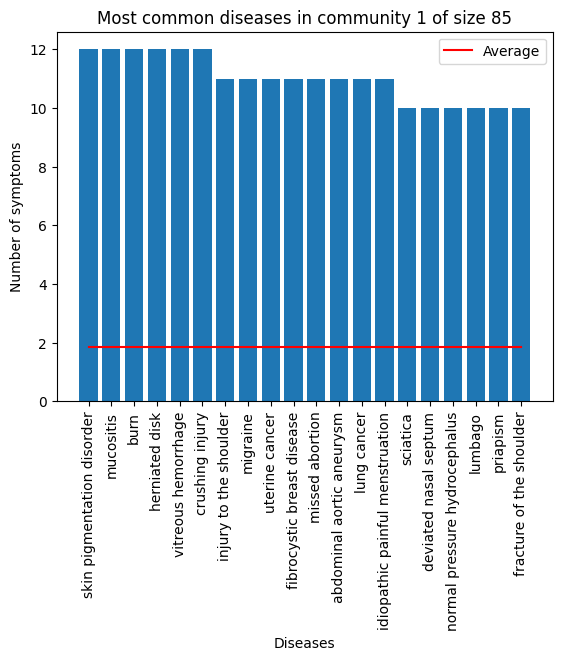

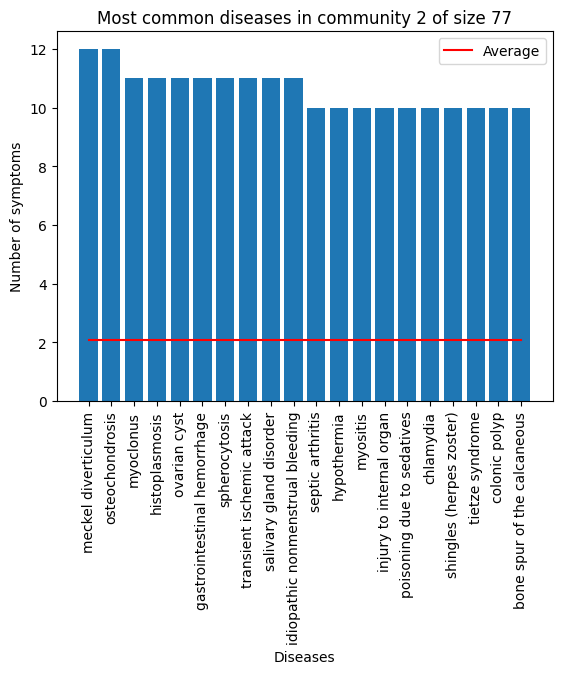

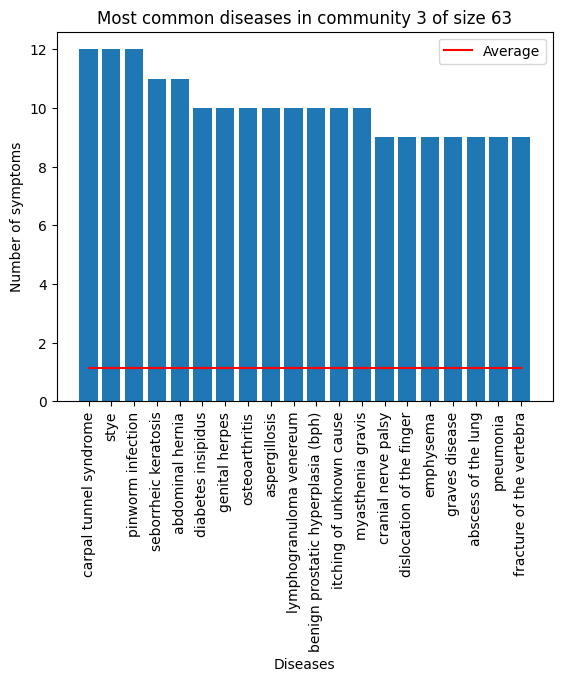

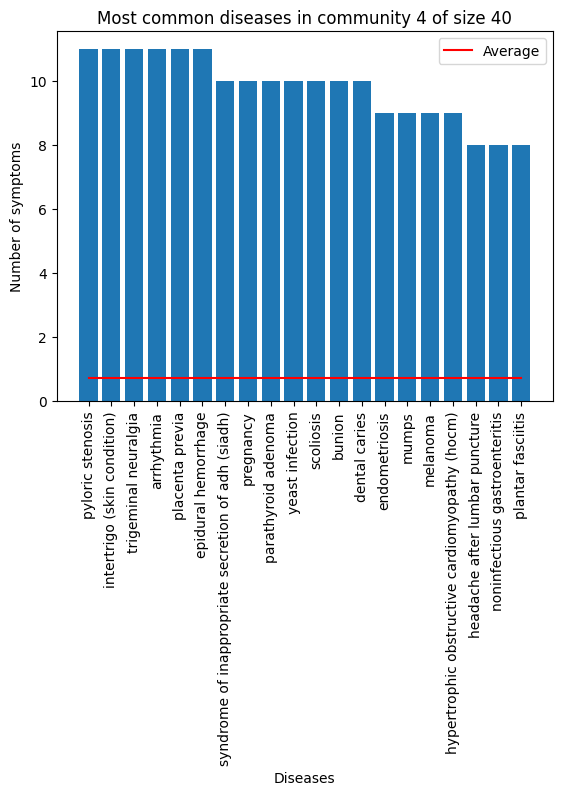

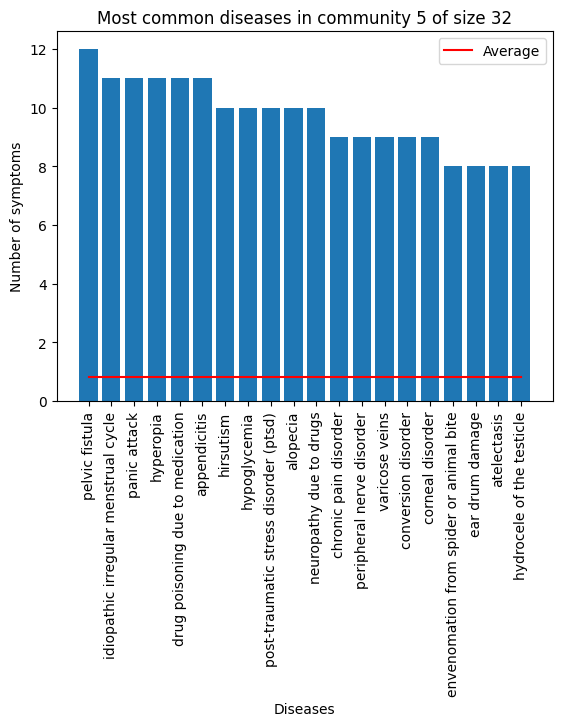

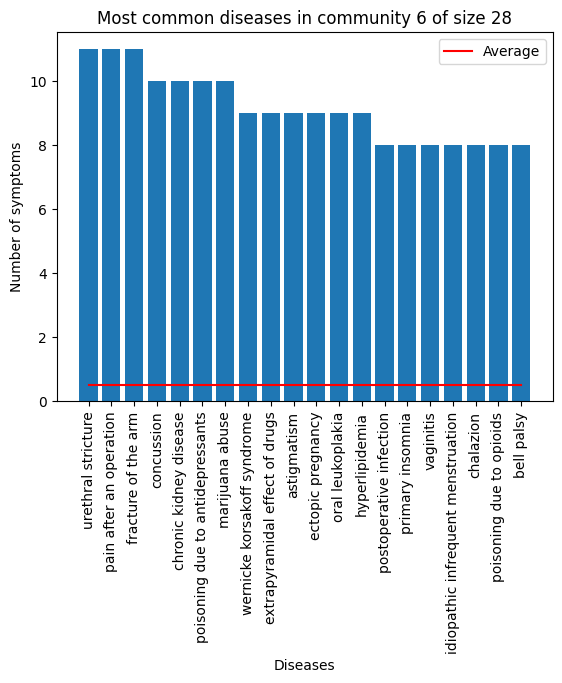

In [32]:
# for each community of symptoms, get the top 20 diseases which are the most commonly pointed by the symptoms in community
comm_symptoms_sizes = pl.top_common_entity(communities_greedy_mod_symptoms, adjacency_matrix, diseases_list, entity = 'symptom', top=20)

# interpretation: the disease 'bum' is pointed by 12 symptoms in the community. On average each symptom points to 3 diseases.

#### 1B. **Common Symptoms for community**: For each disease community, we analyze the most common symptoms.

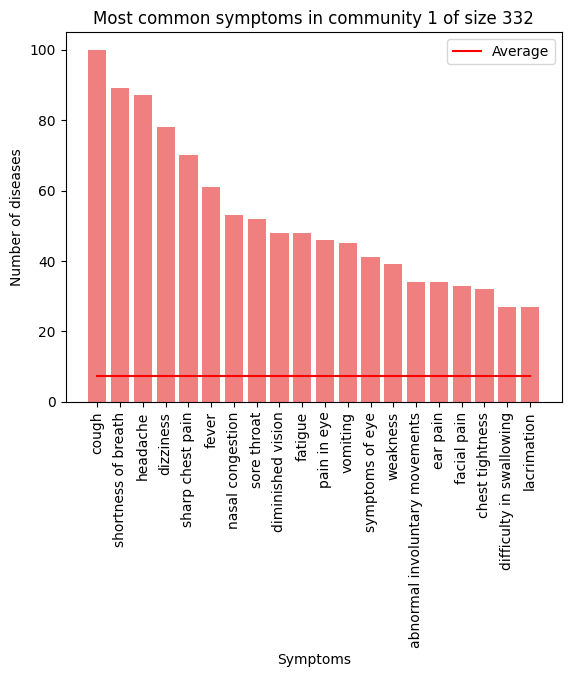

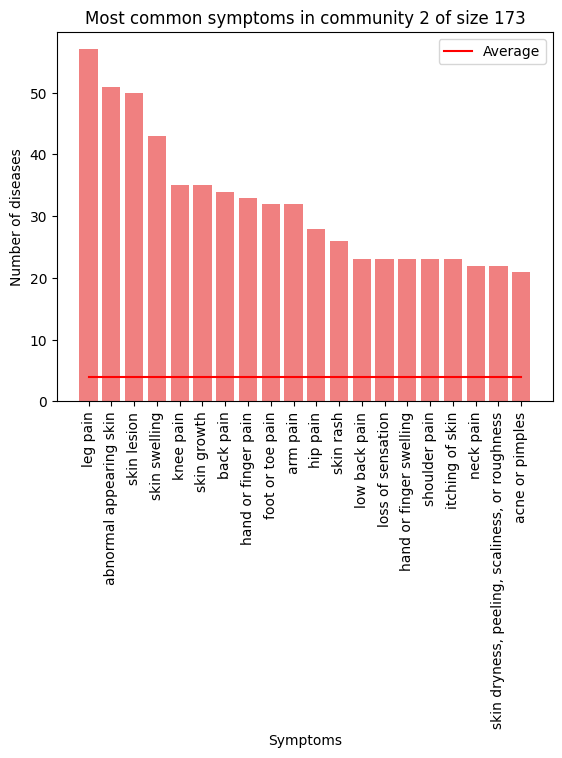

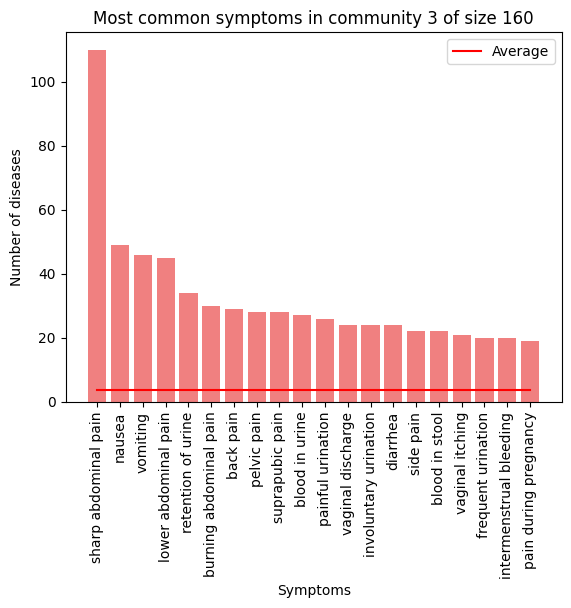

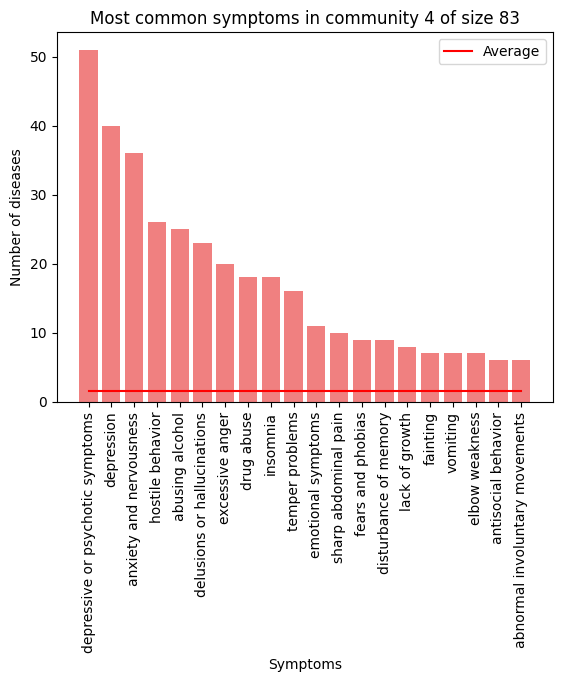

In [33]:
comm_diseases_sizes = pl.top_common_entity(communities_greedy_mod_diseases, adjacency_matrix, symptoms_list, entity = 'disease', top=20)

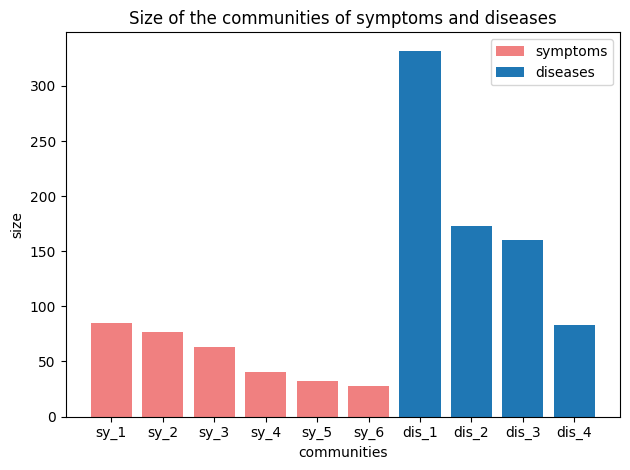

In [37]:
# compare the sizes of the communities of symptoms and diseases using a barplot
comm_sizes = np.hstack((comm_symptoms_sizes, comm_diseases_sizes))
# color the first three elements in blue and the last three in red
plt.bar(np.array(['sy_1', 'sy_2', 'sy_3', 'sy_4', 'sy_5', 'sy_6']), comm_sizes[:6], color='lightcoral')
plt.bar(np.array(['dis_1', 'dis_2' ,'dis_3', 'dis_4']), comm_sizes[6:], color='#1f77b4')
plt.legend(['symptoms', 'diseases'])
plt.xlabel('communities')
plt.ylabel('size')
plt.title('Size of the communities of symptoms and diseases')
plt.tight_layout()
plt.show()

---

## Community Features Extraction

**Girvan-Newman** --> list of tuples of sets. Each set represents a community. Each tuple a level in the dendrogram.

**Greedy Modularity** --> list of frozensets. Each set represents a community.

#### **Community Count**: Vector representing the count of symptoms for each community.
#### **Community Size**: The number of symptoms or diseases in a community.

In [11]:
# Creates features for all the samples and store in npz

# METHOD USED TO GET COMMUNITIES: GREEDY MODULARITY

data_onehot = pd.read_csv("../../dataset/large_one_hot_encoding.csv", compression='gzip')
data_onehot = data_onehot.drop("Unnamed: 0", axis=1)
data_onehot_y = data_onehot["Disease"].values
data_onehot_x = data_onehot.drop("Disease", axis=1).values


# COMMUNITY COUNT
comm_count_matrix = np.zeros((data_onehot_x.shape[0], len(communities_greedy_mod_symptoms)))
for i in range(data_onehot_x.shape[0]):
    comm_count_matrix[i] = cf.get_community_count(data_onehot_x[i], communities_greedy_mod_symptoms)

np.savez_compressed("../prediction_model/features/community_count.npz", X=comm_count_matrix, y=data_onehot_y)

# COMMUNITY SIZE
comm_size_matrix = np.zeros((data_onehot_x.shape[0], data_onehot_x.shape[1]))
for i in range(data_onehot_x.shape[0]):
    comm_size_matrix[i] = cf.get_community_size(data_onehot_x[i], communities_greedy_mod_symptoms)

np.savez_compressed("../prediction_model/features/community_size.npz", X=comm_size_matrix, y=data_onehot_y)

In [12]:
data_count = np.load("../prediction_model/features/community_count.npz")
xc, yc = data_count["X"], data_count["y"]
print(xc.shape, yc.shape)

data_size = np.load("../prediction_model/features/community_size.npz")
xs, ys = data_size["X"], data_size["y"]
print(xs.shape, ys.shape)

(246914, 3) (246914,)
(246914, 325) (246914,)
